# Exploratory Data Analysis
* 探索式資料分析（Exploratory Data Analysis，簡稱 EDA）
* Data visualization plays an important role in EDA.
* EDA performs the exploration and exploitation steps iteratively.
### In the exploration step
* You "explore" the data, usually by visualizing them in different ways, to discover some characteristics of data.
### In the exploitation step
* You use the identified characteristics to figure out the next things to explore.
### Repeat
* Repeat the above two steps until you are satisfied with what you have learned from the data.

[Reference](https://www.bnext.com.tw/article/39237/BN-2016-04-15-114140-77)

# Visualizing the Important Characteristics of a Dataset
* Let's download the Wine dataset using Pandas first:

In [1]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
    header=None)

df.columns = [
    'Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
    'Proline'
]

X = df.drop('Class label', 1)
y = df['Class label']

df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


* Showing data row-by-row with their column names does not help us get the "big picture" and characteristics of data.

* <font color=Red>NOTE</font>: 
     * pd.read_csv() function returns a pandas.DataFrame object. Pandas Dataframe is an useful "two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes".

# Pairwise Join Distributions
* We can instead see the join distribution of any pair of columns/attributes/variables/features by using the pairplot function offered by <font color=Red>Seaborn</font>, which is based on Matplotlib

/home/epl002/DL/env-name/lib/python3.5/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


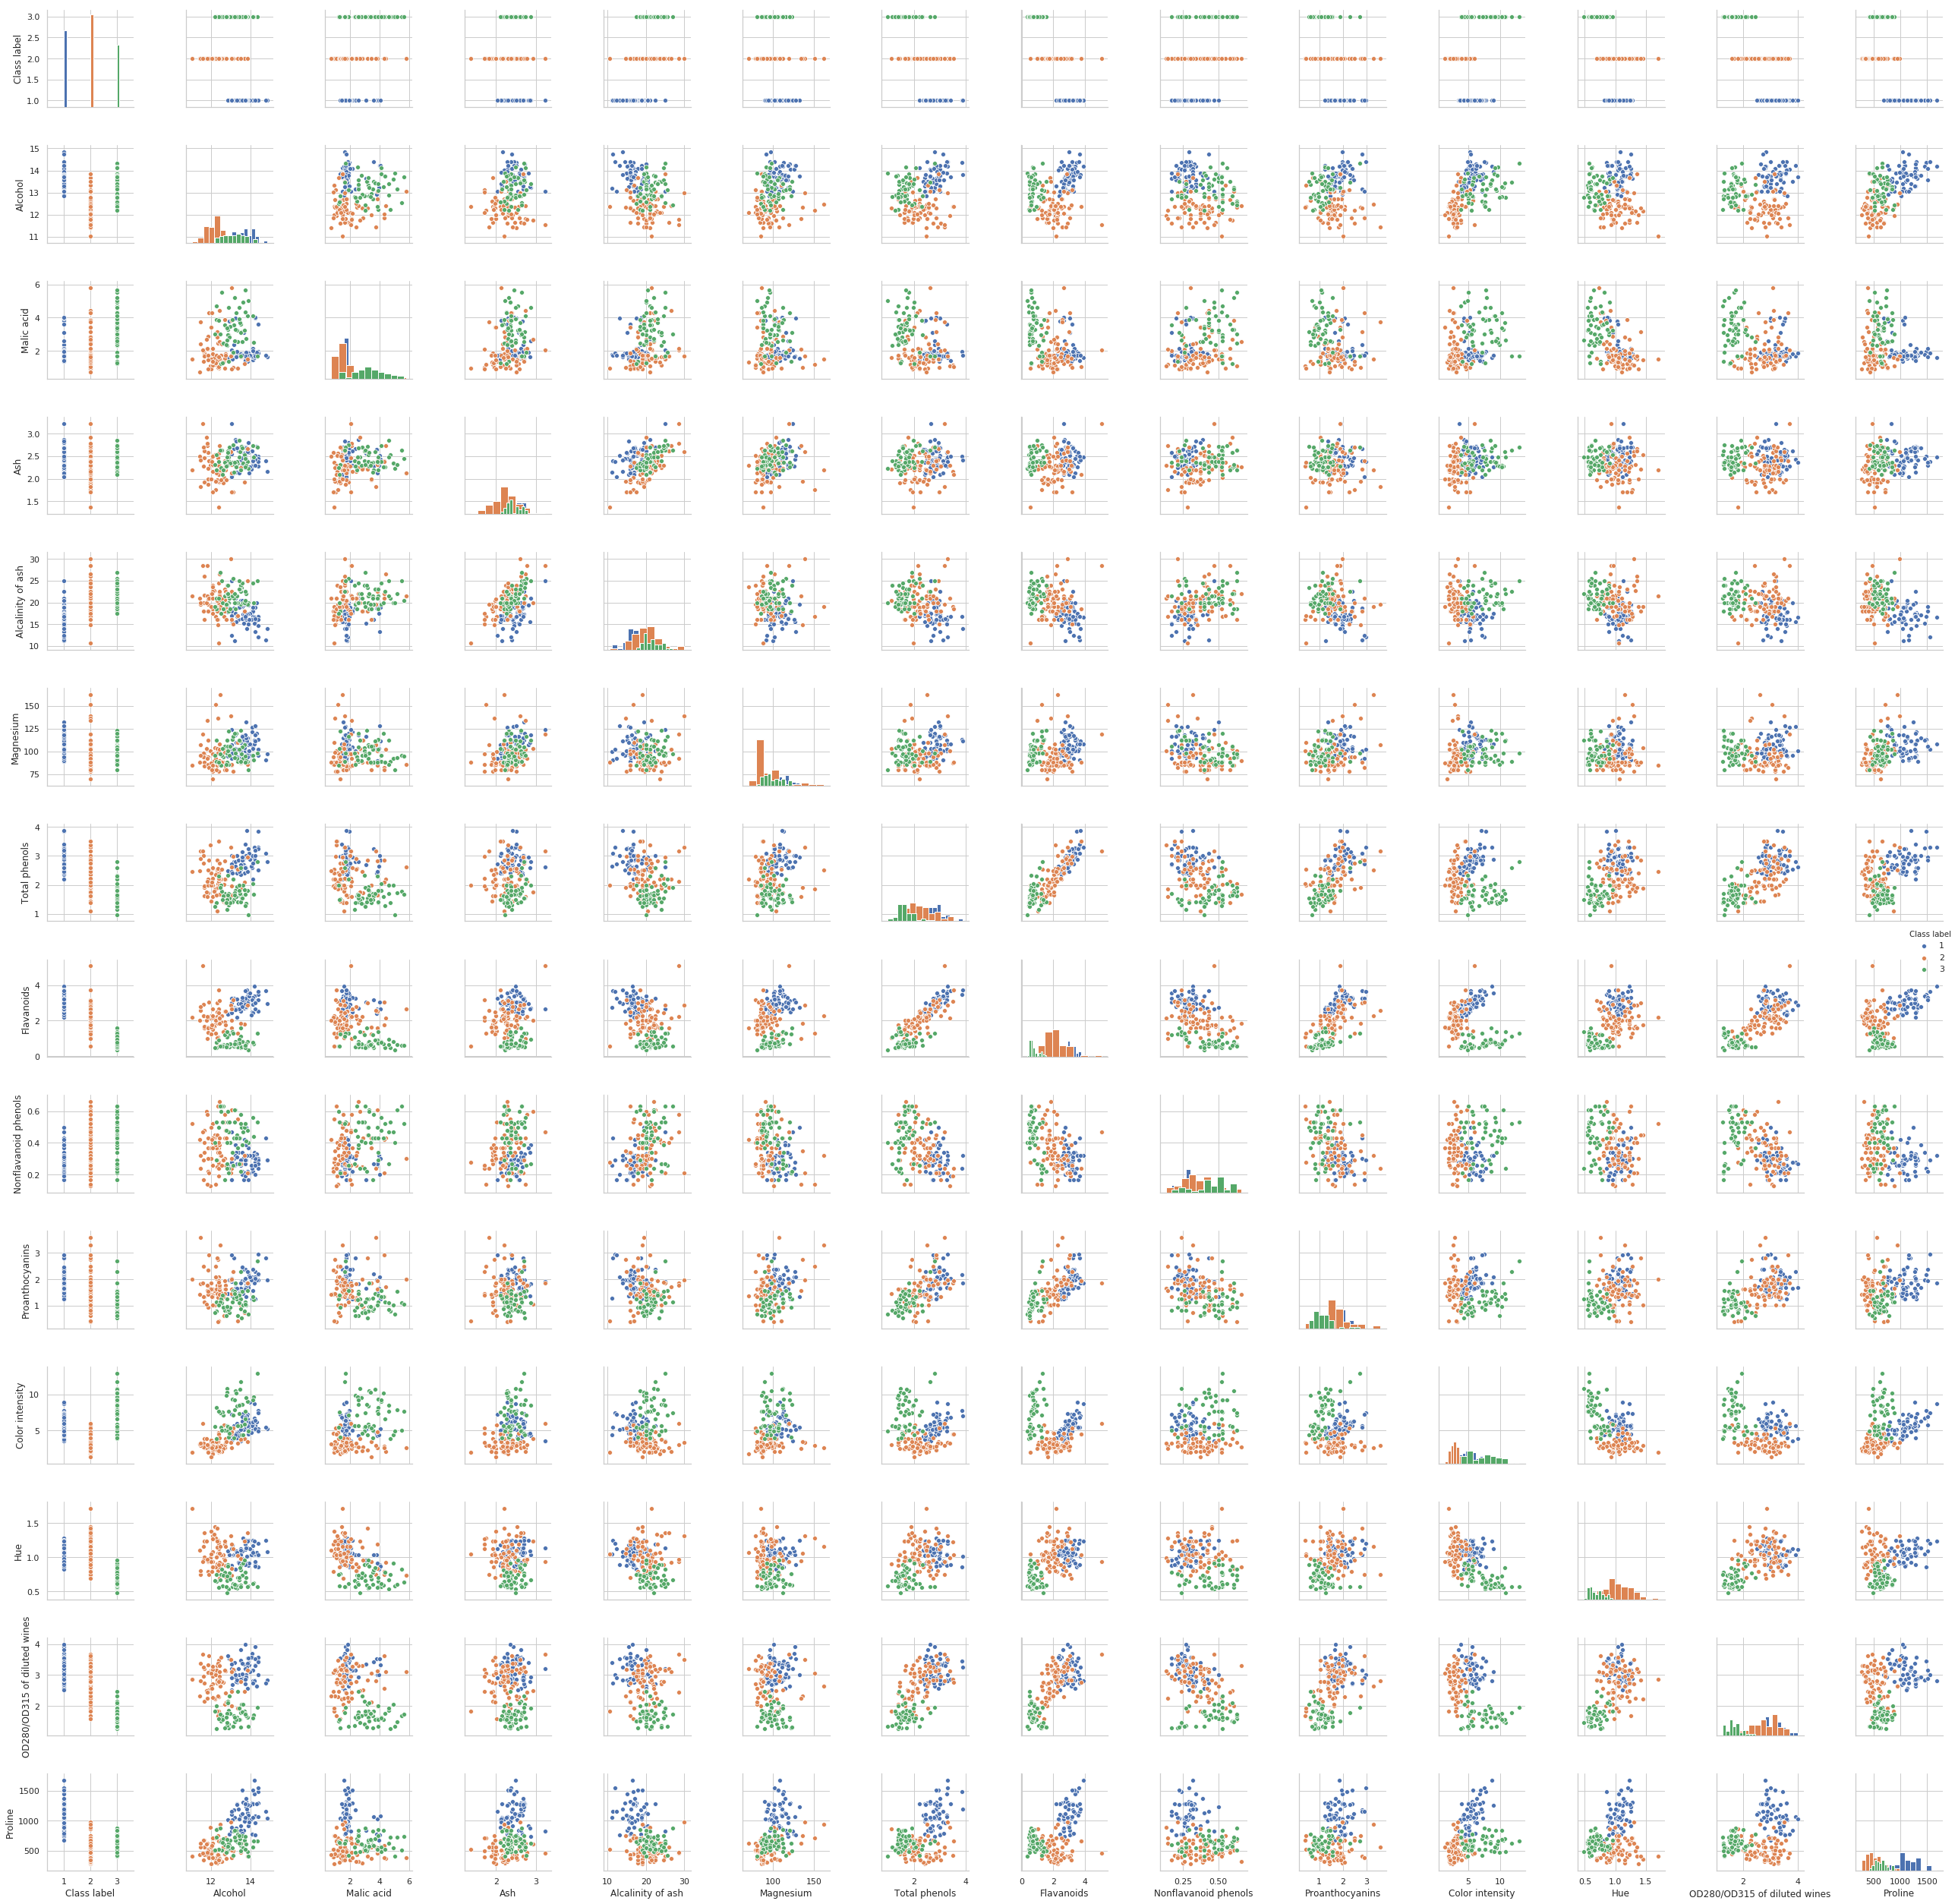

In [2]:
# inline plotting instead of popping out
%matplotlib inline
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

sns.pairplot(df, hue="Class label", size=2.5, diag_kind='hist')
plt.tight_layout()

if not os.path.exists('./output'):
    os.makedirs('./output')
plt.savefig('./output/fig-wine-scatter.png', dpi=300)
plt.show()
warnings.filterwarnings('ignore')

* We can easily see that there is a linear relationship between the "Total phenols" and "Flavanoids" variables.
* The class label cannot be easily predicted by a single variable.
* Noticed that the figures along the diagonal look different.
* See that the "Ash" and "Alcalinity of ash" variables are roughly normally distributed.

# Correlation Matrix
* We can just plot the correlation matrix to quantify the linear relationship between variables.
* The correlation coefficient between two random variables a and b are defined as:
$$\frac{Cov(a,b)}{\sqrt{Var(a)Var(b)}}$$
* It is the "normalized" variance that captures the linear relationship of the two random variables, and the values are bounded to the range [−1,1].
* The correlation matrix $R\in\Bbb R^{D\times D}$ of a random vector x is a square matrix whose each element $R_{i,j}$ denotes the correlation between the attributes $x_{i}$ and $x_{j}$
* If we regard data points as the i.i.d. samples of x , then we can have an estimate $\hat{R}$ whose each element is an estimate of the correlation (usually called the Pearson's r) between attribute $x_{i}$ and $x_{j}$ .
$$\hat{R}_{i,j}=\frac{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})}{\sqrt{\Sigma_{s=1}^{N}(x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}})^{2}}\sqrt{\Sigma_{s=1}^{N}(x_{j}^{(s)}-\hat{\mu}_{\mathrm{x}_{j}})^{2}}}=\frac{\hat{\sigma}_{\mathrm{x}_{i},\mathrm{x}_{j}}}{\hat{\sigma}_{\mathrm{x}_{i}}\hat{\sigma}_{\mathrm{x}_{j}}}$$
* $\color{red}{Note}$ that if we $\color{red}{z-normalize}$ each data point such that for all $i$. Then we simply have $\hat{R}=\frac{1}{N}Z^{T}Z$, where $Z$ is the design matrix of the normalized data points. We can plot $\hat{R}$ as follows:
$$z_{i}^{(s)}=\frac{x_{i}^{(s)}-\hat{\mu}_{\mathrm{x}_{i}}}{\hat{\sigma}_{\mathrm{x}_{i}}}$$

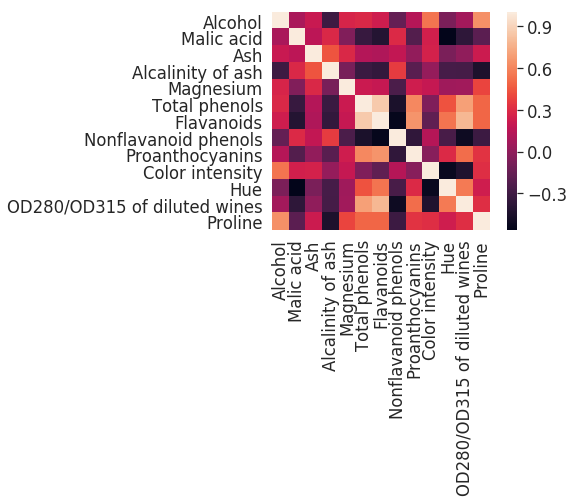

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df.shape[0]

sns.set(font_scale=1.5)

ticklabels = [s for s in X.columns]

hm = sns.heatmap(R,
            cbar=True,
            square=True,
            yticklabels=ticklabels,
            xticklabels=ticklabels)

#plt.tight_layout()
plt.savefig('./output/fig-wine-corr.png', dpi=300)
plt.show()

sns.reset_orig()

* The correlation matrix gives a more concise view of the relationship between variables. 
* A heatmap of correlations can help us select variables supporting this assumption.
* For example, if we want to predict the "Hue" variable using the linear regression, we may pick the "Malic acid" and "Flavanoids" as the explanatory variables.
* We calculate $\hat{R}$ by ourselves using the normalized design matrix $Z$ because we will reuse $Z$ later.

# PCA for Visualization
* PCA reduces the dimension of data points, and has been widely used across different machine learning tasks.
* One application of PCA is to help the visualization of high-dimensional data.
* Principal component analysis finds a projection matrix, where $w^{i}$ are orthonormal vectors, such that each attribute $z^{pca}_{j}=w^{(j)T}z$ has the maximum variance Var($z^{pca}_{j}$). 
$$\boldsymbol{W}=[w^{(1)}, ..., w^{(k)}] \in \mathbb{R}^{D\times K}$$
* This problem can be reduced to solve by Rayleigh's Quotient, the optimal $w^{(i)}$ is given by the eigenvector of $Z^{T}Z$ (or $\hat{R}$) corresponding to the ith largest eigenvalue.
$$arg \max_{w^{i}\in \mathbb{R}^{D}} w^{(i)T}Z^TZw^{(i)} ,\mspace{5mu} for \mspace{5mu} i \in [1,\mspace{3mu}K]$$

# Summarize PCA in a few simple steps:
1. Standardize the $D$-dimensional dataset $X$ , e.g., via the z-normalization, and get $Z$;
    * 標準化dataset,然後得到$Z$
2. Estimate the covariance matrix $\hat{R}$;
    * 計算共變異矩陣$\hat{R}$
3. Decompose $\hat{R}$ into its eigenvectors and eigenvalues;
    * 分解$\hat{R}$拿到eigenvectors和eigenvalues
4. Select $K$ eigenvectors that correspond to the $K$ largest eigenvalues, where $K$ is the dimensionality of the new feature subspace (k<d);
    * 從前K大的eigenvalues拿相對於eigenvalues的eigenvectors，這K個是在新的feature subspace
5. Construct a projection matrix $W$ from the top-K eigenvectors;
    * 用剛才拿到K個eigenvectors建立一個projection matrix $W$
6. Transform the $D$-dimensional input dataset $Z$ using the projection matrix $W$.
    * 將input dataset $Z$ 透過$W$轉換

# Eigendecomposition
* $\color{red}{NOTE}$: there is an np.linalg.eig() function in NumPy that also eigendecomposes matrices. The difference is that np.linalg.eigh() is optimized for symmetric matrices whose eigenvalues are always real numbers. The numerically less stable np.linalg.eig() can decompose non-symmetric square matrices and returns complex eigenvalues.
* Since we already have $Z$ and $\hat{R}$ from the above. We can begin from the step 3:

In [4]:
eigen_vals, eigen_vecs = np.linalg.eigh(R)

print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[0.10337794 0.16877023 0.22578864 0.25090248 0.28887994 0.34849736
 0.55102831 0.64165703 0.85322818 0.91897392 1.44607197 2.49697373
 4.70585025]


# Eigenvector Selection
* In step 4, we need to decide the value of $K$. We can plot the variance explained ratio of each eigenvalue:
$$\frac{\vert\lambda_{j}\vert}{\Sigma_{j=1}^{D}\vert\lambda_{j}\vert}$$
* in the descending order to help us decide how many eigenvectors to keep.

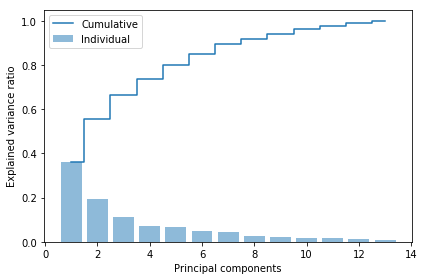

In [5]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./output/fig-pca-var-exp.png', dpi=300)
plt.show()

* The resulting plot indicates that the first principal component alone accounts for 40 percent of the variance.
* We can see that the first two principal components combined explain almost 60 percent of the variance in the data. 
* Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in this dataset.

# Feature Transformation
* Let's now proceed with the last three steps to project the standardized Wine dataset onto the new principal component axes. We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

* Next, we pick the first two eigenvectors and form the project matrix $W$:

In [7]:
W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Projection matrix W:\n', W)

Projection matrix W:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


* Finally, we can obtain the compressed dataset by:
$$\boldsymbol{Z}^{\text{PCA}}=\boldsymbol{Z}\boldsymbol{W}$$
* and visualize it using:

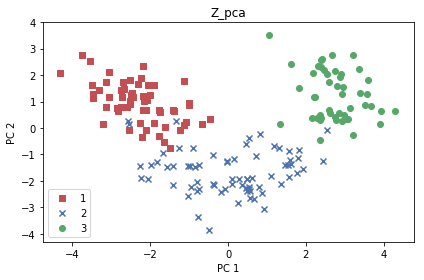

In [8]:
Z_pca = Z.dot(W)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y.values), colors, markers):
    plt.scatter(Z_pca[y.values==l, 0], 
                Z_pca[y.values==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.savefig('./output/fig-pca-z.png', dpi=300)
plt.show()

* The data is more spread along the x-axis corresponding to the first principal component than the y-axis (second principal component), which is consistent with the explained variance ratio plot that we created in the previous subsection.
* PCA may save us from examining a lot of pairwise distributions (as shown in the previous section) when the original data dimension D is high.
* For example, if we see that the data points with different labels can be separated in the space of PCs, then we can simply choose a linear classifier to do the classification.

In [9]:
np.save('./output/Z_pca.npy', Z_pca)

# Assignment

* Here's a generated dataset, with 3 classes and 15 attributes.
* Your goal is to reduce data dimension to 2 and 3, and then plot 2-D and 3-D visualization on the compressed data, respectively.

In [10]:
#import libs, load data

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_load = pd.read_csv('https://nthu-datalab.github.io/ml/labs/02_EDA_PCA/gen_dataset.csv')

X_load = df_load.drop('Class label', 1)
Y_load = df_load['Class label']

df_load.head()

,Class label,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15
0,2.0,-0.016488,-1.310538,-1.552489,-0.785475,1.548429,0.476687,1.090010,-0.351870,-0.000855,-1.932941,0.499177,0.149137,-0.640413,-0.782951,-0.903561
1,0.0,-0.844201,-1.235142,-0.624408,1.502470,-0.079536,1.482053,1.178544,-1.150090,-1.040124,-1.041435,0.281037,-0.283710,-1.176802,0.718408,-0.392095
2,0.0,-0.181053,0.039422,-0.307827,0.162256,-1.283705,0.541288,0.019113,-0.470718,-1.045754,0.983150,-0.121205,-0.189225,-0.539178,0.825261,0.612889
3,2.0,-0.423555,-1.598754,1.597206,-0.239330,1.443564,2.657538,1.824393,-1.809287,1.058634,-4.058539,0.255908,-0.952422,-0.315551,1.854246,-2.369018
4,2.0,-0.499408,-0.814229,-0.178777,-1.757823,0.678134,3.552825,1.483069,-2.341943,2.155062,-4.380612,-0.239352,-1.730919,0.586125,3.902178,-2.891653


In [11]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Z-normalize data
sc = StandardScaler()
Z = sc.fit_transform(X_load)
# Estimate the correlation matrix
R = np.dot(Z.T, Z) / df_load.shape[0]

#calculate the eigen values, eigen vectors
eigen_vals, eigen_vecs = np.linalg.eigh(R)

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(reverse=True)

#form the projection matrix
W_2D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

"""code"""
W_3D = np.hstack((eigen_pairs[0][1][:, np.newaxis],
                   eigen_pairs[1][1][:, np.newaxis],
                   eigen_pairs[2][1][:, np.newaxis]))
"""code end"""

#you should form a projection matrix which projects from raw-data dimension to 3 dimension here

'code end'

* You can see [here](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) for information about plotting 3D graph

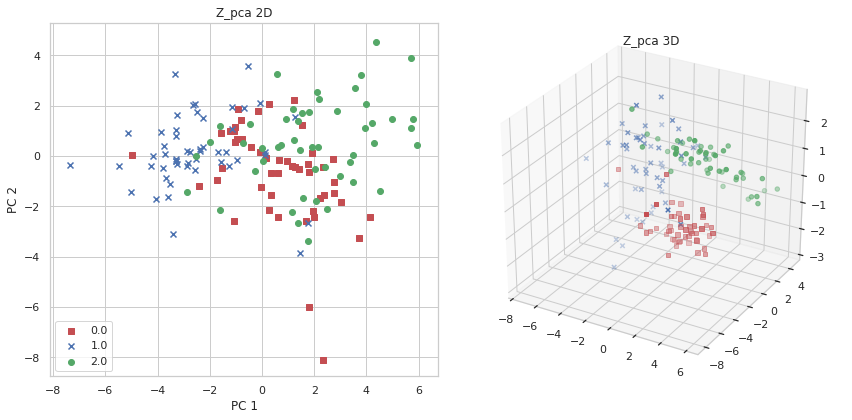

In [12]:
import os
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

#import Axes3D for plottin 3d scatter
from mpl_toolkits.mplot3d import Axes3D

#cacculate z_pca(2d and 3d)
Z_pca2 = Z.dot(W_2D)

"""code"""
Z_pca3 = Z.dot(W_3D)
"""code end"""

#plot settings
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
fig = plt.figure(figsize=(12,6))

#plot 2D
plt2 = fig.add_subplot(1,2,1)
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt2.scatter(Z_pca2[Y_load==l, 0], 
                Z_pca2[Y_load==l, 1], 
                c=c, label=l, marker=m)

plt.title('Z_pca 2D')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

#plot 3D
plt3 = fig.add_subplot(1,2,2, projection='3d')
#you should plot a 3D scatter using plt3.scatter here (see Axes3D.scatter in matplotlib)
"""code"""
for l, c, m in zip(np.unique(Y_load), colors, markers):
    plt3.scatter(Z_pca3[Y_load==l, 0], 
                Z_pca3[Y_load==l, 1],
                Z_pca3[Y_load==l, 2],
                c=c, label=l, marker=m)

plt.title('Z_pca 3D')
plt.tight_layout()
"""code end"""

if not os.path.exists('./output'):
    os.makedirs('./output')
plt.savefig('./output/fig-pca-2-3-z.png', dpi=300)
plt.show()

* From this assignment, you can see the different results between different numbers of principle components chosen.

# 整體概念
* 主要是希望用PCA達到dimension reduction的目的
* 為了避免Hughes 現象(Hughes Phenomenon)/ 維度詛咒(curse of dimensionality)
* 維度詛咒:預測/分類能力通常是隨著維度數(變數)增加而上生，但當模型樣本數沒有繼續增加的情況下，預測/分類能力增加到一定程度之後，預測/分類能力會隨著維度的繼續增加而減小
* 主成份分析的基本假設是希望資料可以在特徵空間找到一個投影軸(向量)投影後可以得到這組資料的最大變異量
-----------
* [Reference](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71)